# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [3]:
books = pd.read_parquet("./goodsread/books.parquet")

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [5]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [4]:
interactions = pd.read_parquet("./goodsread/interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [7]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [8]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [12]:
books.sample(3).T

471579   \
book_id                                                           10589   
author                                                     Stephen King   
title                                                      Bag of Bones   
description           Four years after the sudden death of his wife,...   
genre_and_votes                       {'Horror': 3310, 'Fiction': 1190}   
num_pages                                                           736   
average_rating                                                     3.87   
ratings_count                                                    133655   
text_reviews_count                                                 2515   
publisher                                                  Pocket Books   
publication_year                                                   1999   
country_code                                                         US   
language_code                                                     en-US   
format                                            Mass Market Paperback   
is_ebook                                                          False   
isbn                                                         067102423X   
isbn13                                                    9780671024239   
genre_and_votes_dict  {'Academic': None, 'Academic-Academia': None, ...   
genre_and_votes_str                           Horror 3310, Fiction 1190   

                                                                1889526  \
book_id                                                          302546   
author                             Larry Niven, Dean Ing, Poul Anderson   
title                             The Man-Kzin Wars (Man-Kzin Wars, #1)   
description           Once upon a time, in the earliest days of inte...   
genre_and_votes       {'Science Fiction': 252, 'Fiction': 48, 'Short...   
num_pages                                                           289   
average_rating                                                     3.66   
ratings_count                                                      3318   
text_reviews_count                                                   62   
publisher                                                    Baen Books   
publication_year                                                   2006   
country_code                                                         US   
language_code                                                     en-US   
format                                                        Paperback   
is_ebook                                                          False   
isbn                                                         1416532838   
isbn13                                                    9781416532835   
genre_and_votes_dict  {'Academic': None, 'Academic-Academia': None, ...   
genre_and_votes_str   Science Fiction 252, Fiction 48, Short Stories 20   

                                                                140022   
book_id                                                          683695  
author                                                   Yoshiko Uchida  
title                                                     Picture Bride  
description           Carrying a photograph of the man she is to mar...  
genre_and_votes       {'Historical-Historical Fiction': 33, 'Fiction...  
num_pages                                                           222  
average_rating                                                     3.57  
ratings_count                                                       697  
text_reviews_count                                                  104  
publisher                                University of Washington Press  
publication_year                                                   1997  
country_code                                                         US  
language_code                                                       eng  
format                    

Посмотрим на данные о взаимодействиях пользователей с книгами.

In [13]:
books["book_id"].nunique()

43312

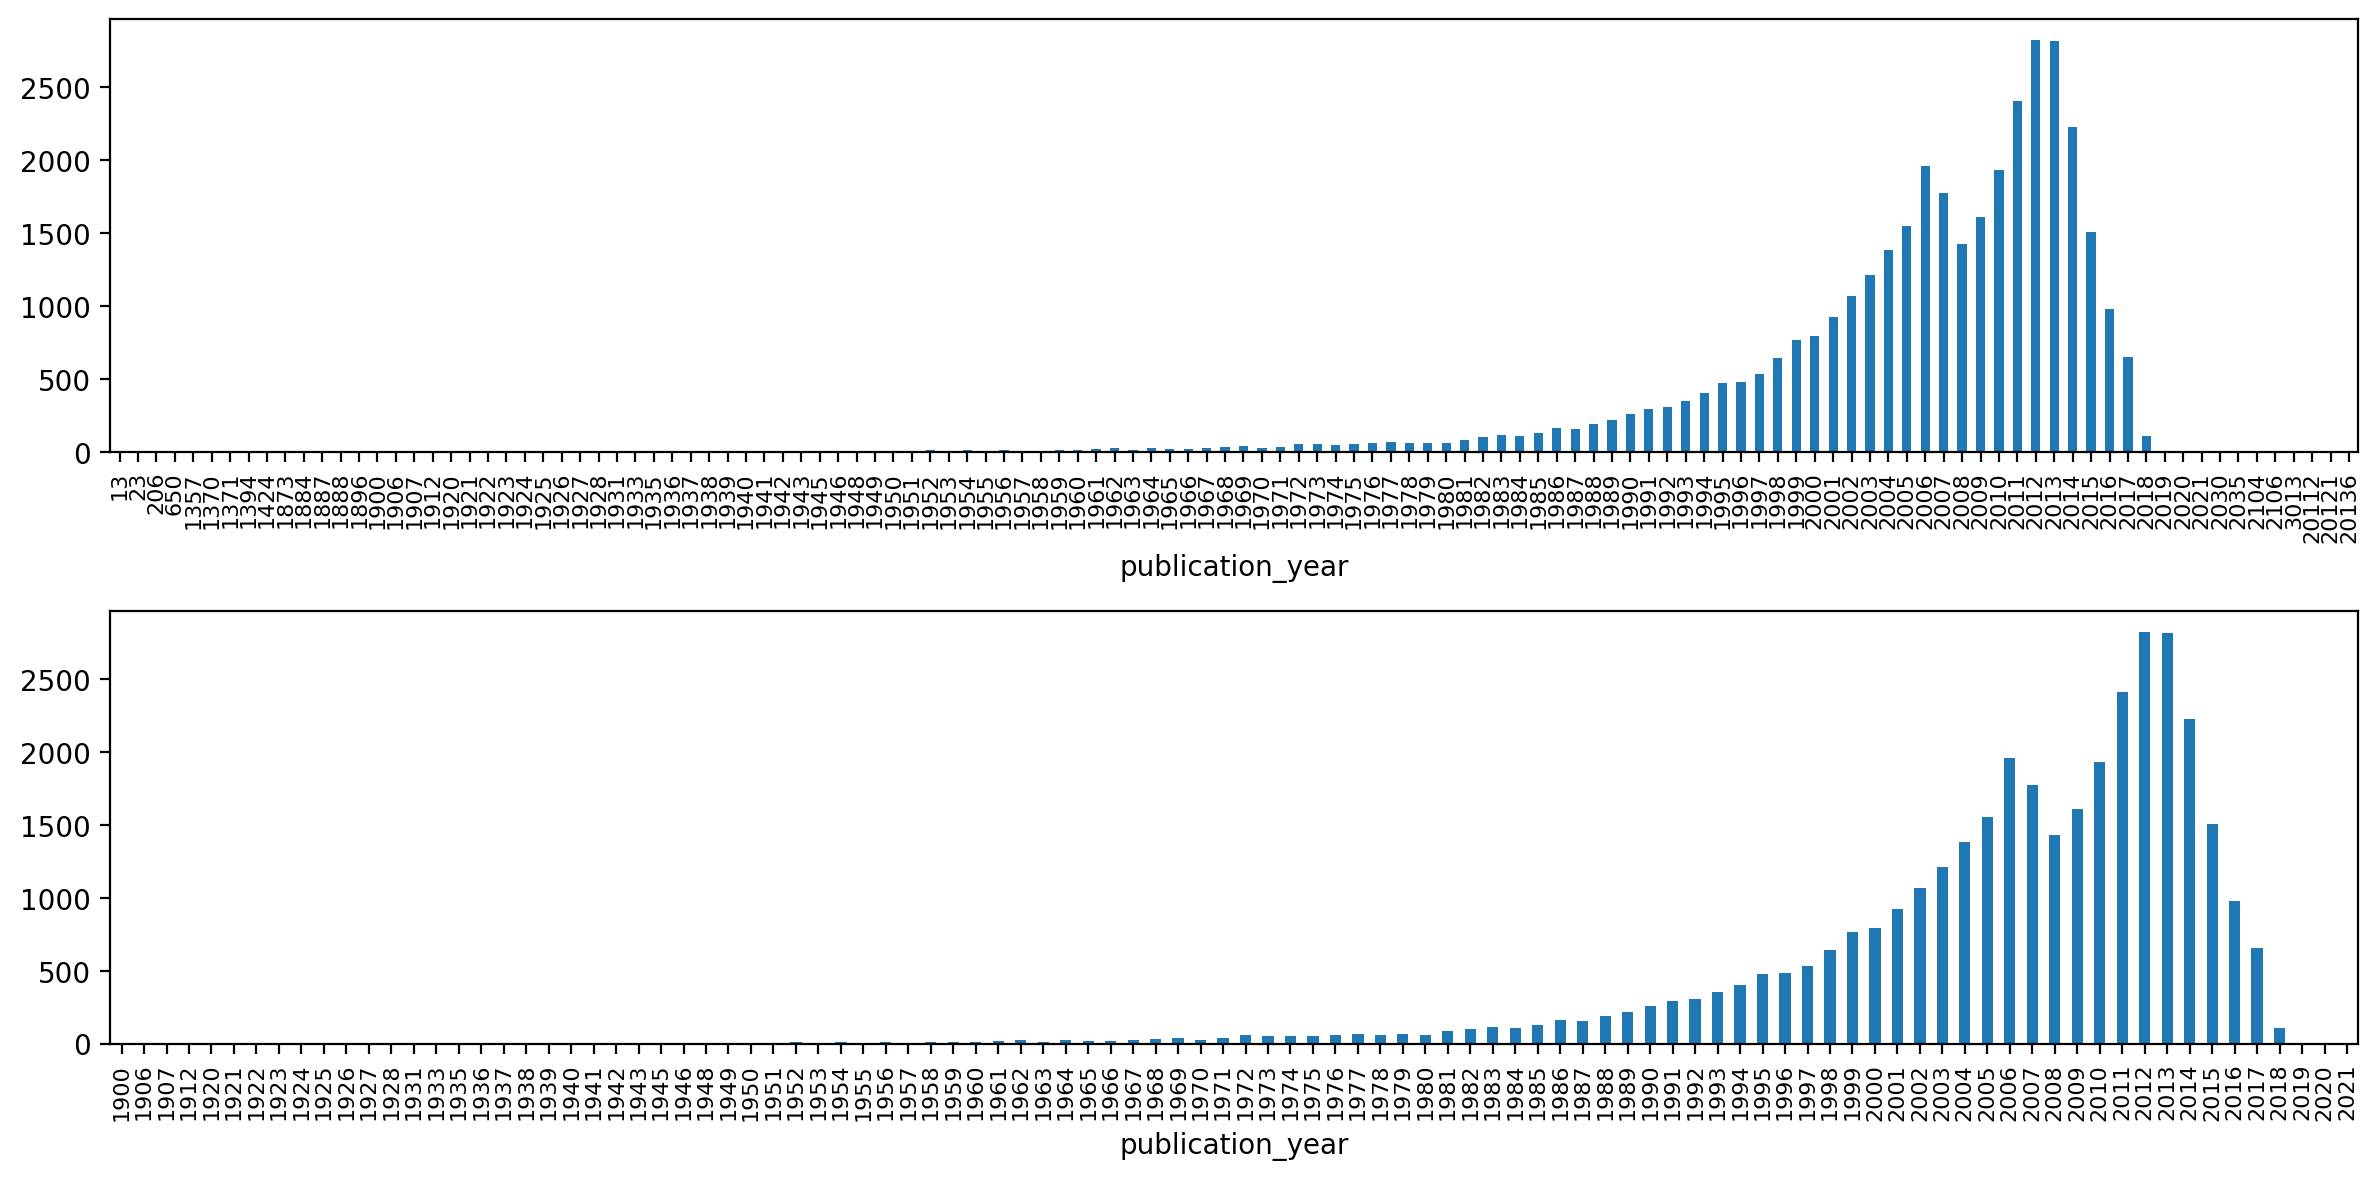

In [14]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [6]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [7]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [8]:
interactions_by_month.tail(6)

started_at_month  events   users
126       2017-07-01  224919  100177
127       2017-08-01  202129   93040
128       2017-09-01  172187   82694
129       2017-10-01  108107   58076
130       2017-11-01     565     475
131       2017-12-01      34      34

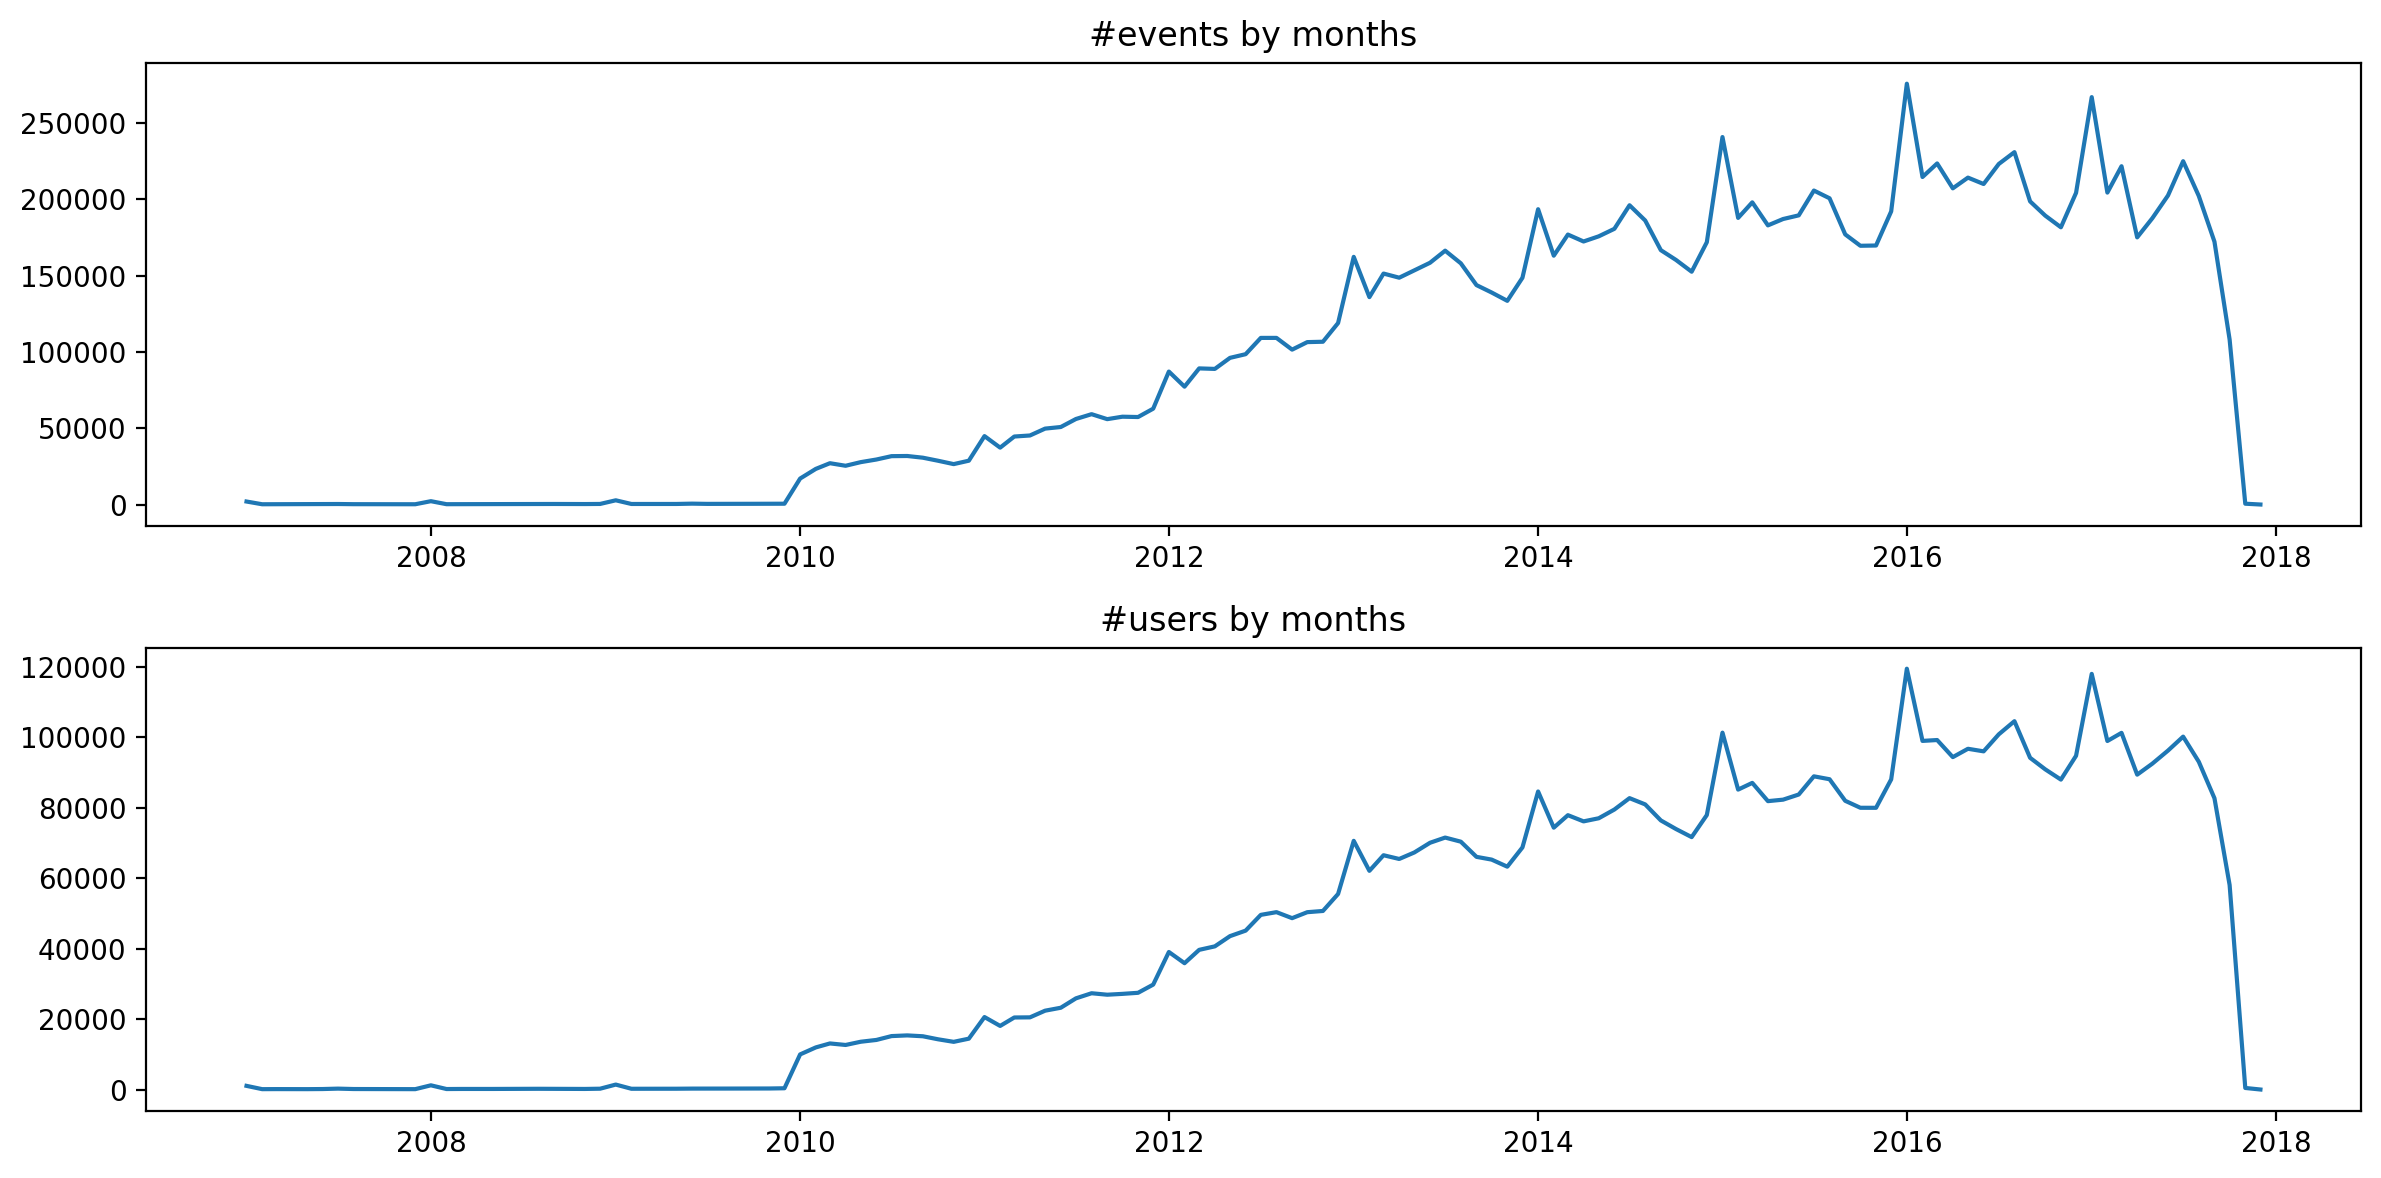

In [31]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

## Факультативно

количество пользователей

In [67]:
interactions.nunique()["user_id"]

542657

среднее количество прочитанных книг на пользователя

In [52]:
books_by_user = interactions.groupby("user_id").agg({"book_id":"count"}).mean()
books_by_user

book_id    23.754294
dtype: float64

долю прочитанных книг, у которых нет рейтинга

In [63]:
percent_of_empty_rating_books = books[books["average_rating"] == 0]["book_id"].count()/books["book_id"].count() * 100
percent_of_empty_rating_books

0.01847063169560399

распределение рейтинга

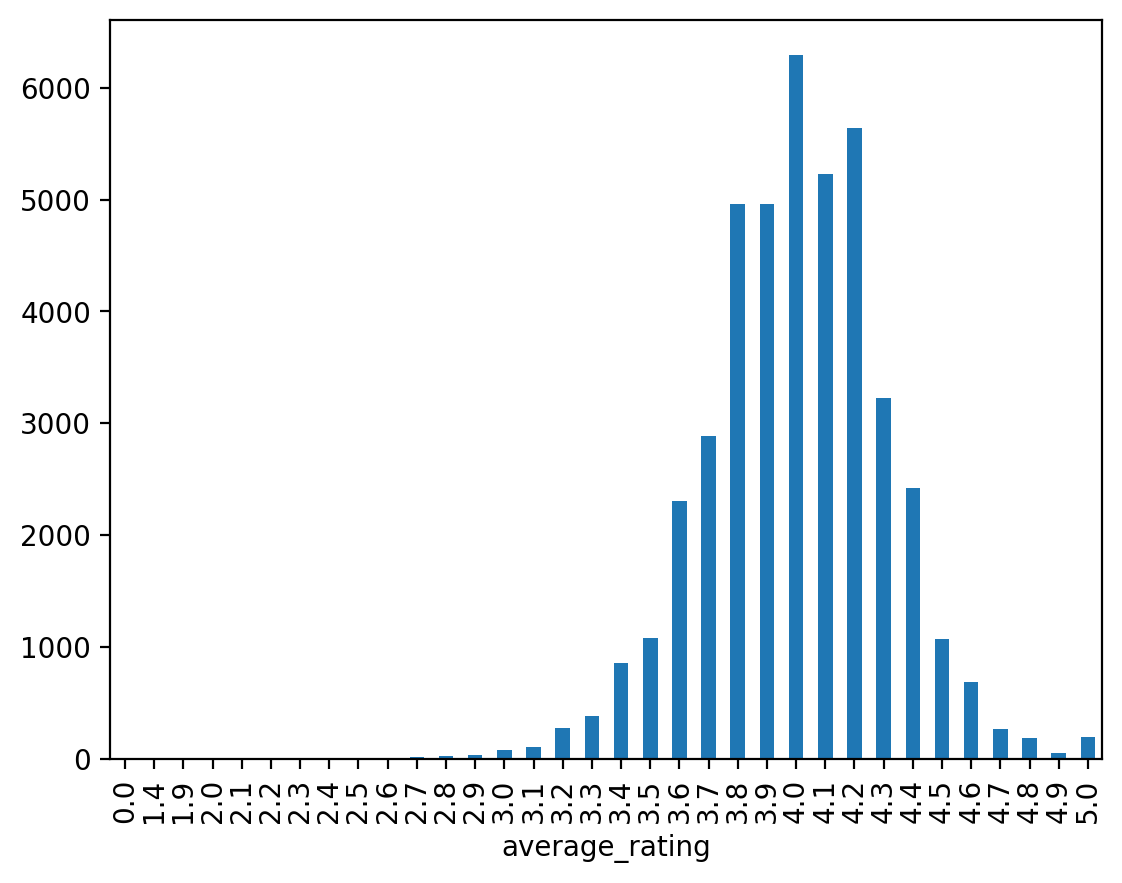

In [65]:
books["average_rating"].round(1).value_counts().sort_index().plot(kind="bar")
plt.show()

распределение популярности (долю пользователей, приходящуюся на одну книгу)

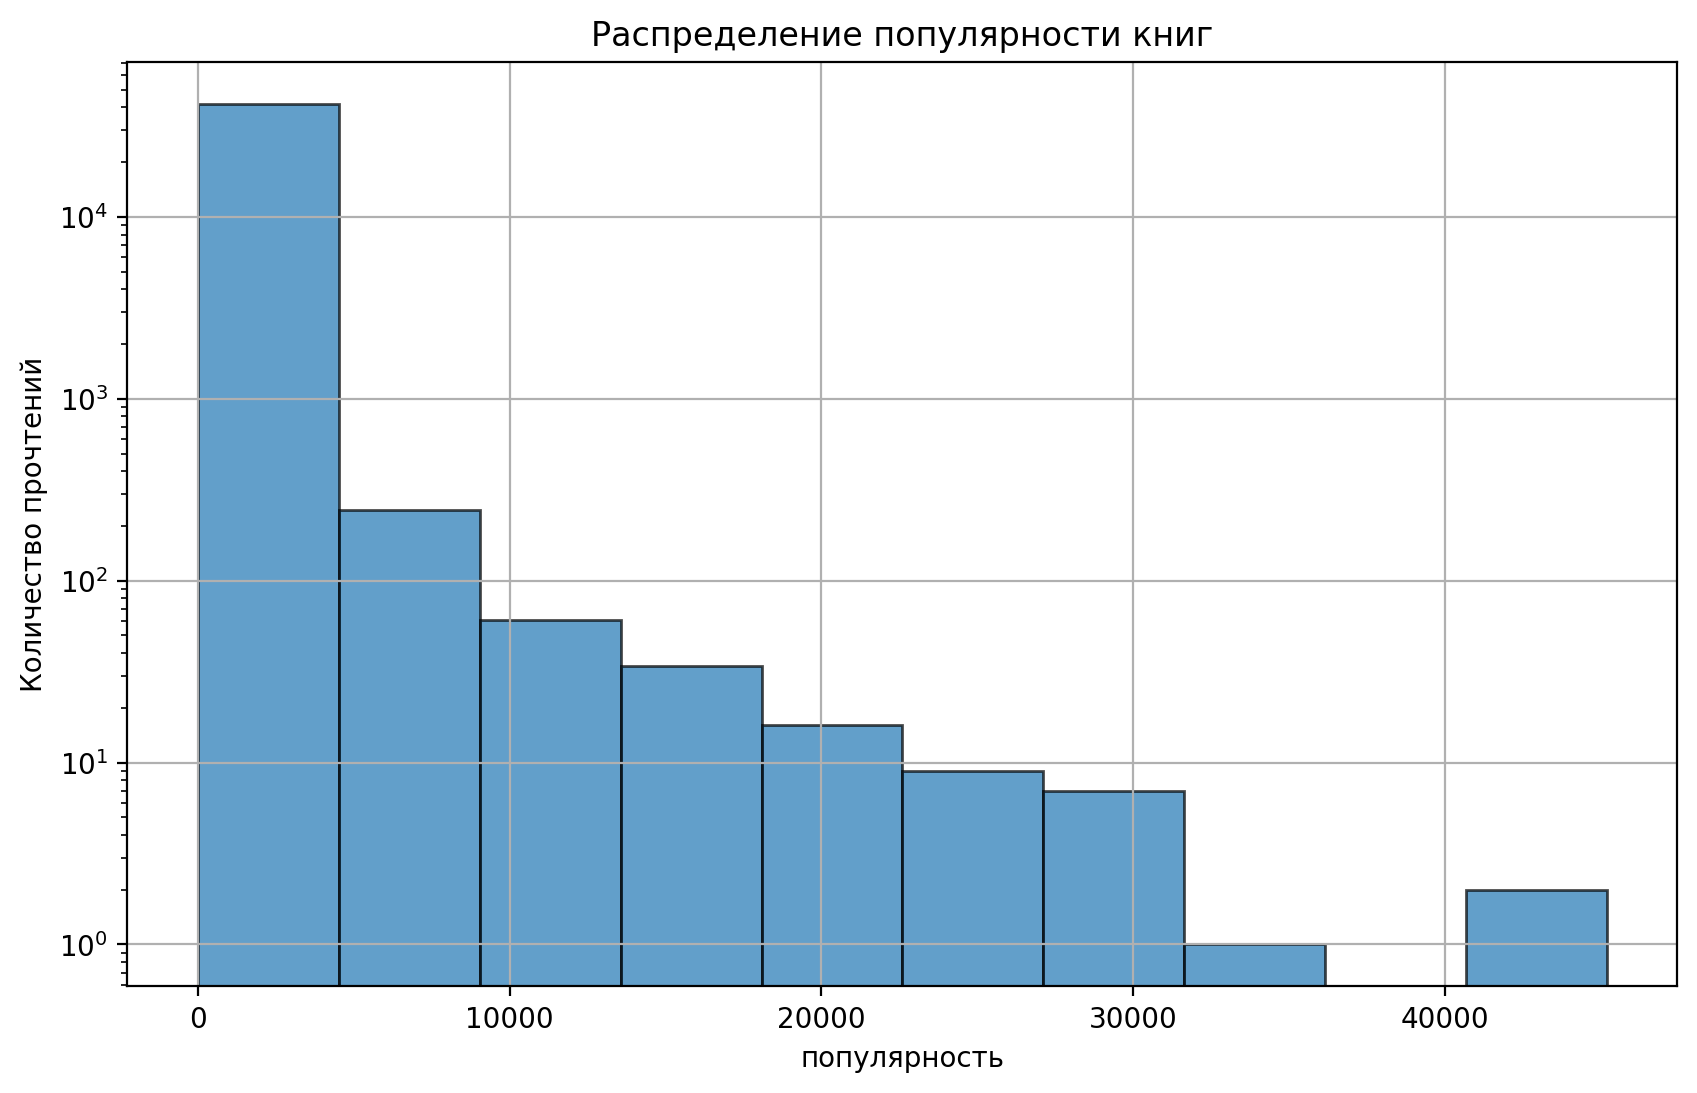

In [6]:
popularity = interactions.groupby("book_id").agg({"user_id":"count"})

plt.figure(figsize=(10, 6))  # Установка размера фигуры
plt.hist(popularity, bins=10, edgecolor='black', alpha=0.7,log=True)  
# bins указывает количество столбцов в гистограмме
# edgecolor задает цвет края столбцов
# alpha устанавливает прозрачность столбцов

plt.title('Распределение популярности книг')  # Установка заголовка графика
plt.xlabel('популярность')  # Установка метки оси X
plt.ylabel('Количество прочтений')  # Установка метки оси Y
plt.grid(True)  # Включение сетки на графике для лучшей читаемости
plt.show()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [79]:
items = books.copy()
events = interactions.copy()

Переименовка столбцов

In [80]:
items.rename(columns = {'book_id': 'item_id'}, inplace = True)
events.rename(columns = {'book_id': 'item_id'}, inplace = True)

In [93]:
del books
del interactions

In [81]:
# начальное количество записей событий
start_events_num = events.shape[0]

# оставим события только до ноября 2017
event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

# Ваш код здесь

вычислим количетво книг у каждого пользователя

In [82]:
events["count_books"] = events.groupby("user_id")["item_id"].transform("count")

отберём события для читателей 
- прочитавших от 2х книг
- поставивших оценку книге
- с флагом прочитано = True

In [83]:

events = events.loc[events["rating"] > 0]
events = events.loc[events["is_read"] == True]
events = events.loc[events["count_books"] >= 2]

#events.query("rating > 0 and count_books >= 2 and is_read == True").copy()
print("Процент записей после фильтрования",events.shape[0] / start_events_num * 100)

Процент записей после фильтрования 91.29233352422425


Переобозначим интексы пользователям

In [84]:
events["new_user_id"] = pd.factorize(events["user_id"],sort=True)[0] + 1000000

In [28]:
old_id = events["user_id"].sort_values(ascending=False).unique()
np.where(old_id == "8f50136afeb65c55cec7b3d306c24b03")[0]

array([196483])

In [85]:
events.loc[events["user_id"] == '8f50136afeb65c55cec7b3d306c24b03']

user_id  item_id  started_at     read_at  \
10841363  8f50136afeb65c55cec7b3d306c24b03   253058  2012-12-29  2013-01-22   
10841364  8f50136afeb65c55cec7b3d306c24b03    10572  2012-01-02  2013-01-27   

          is_read  rating  is_reviewed  count_books  new_user_id  
10841363     True       3         True            2      1250820  
10841364     True       5        False            2      1250820

In [86]:
events.drop(["user_id","count_books"],axis=1,inplace=True)
events.rename(columns = {"new_user_id":"user_id"},inplace=True)
events.tail()

item_id  started_at     read_at  is_read  rating  is_reviewed  \
12914452     5297  2017-02-07  2017-02-26     True       5        False   
12914453     4900  2016-12-22  2016-12-29     True       2        False   
12914454    14836  2016-11-29  2017-01-15     True       3        False   
12914456    10210  2012-06-05  2013-01-17     True       5        False   
12914457    99561  2012-07-21  2012-07-22     True       4        False   

          user_id  
12914452  1378860  
12914453  1378860  
12914454  1378860  
12914456  1308836  
12914457  1308836

# Сохранение результатов

In [89]:
items.to_parquet("./goodsread/items.par")

In [91]:
events.to_parquet("./goodsread/events.par")

In [92]:
del items
del events